In [1]:
import glmnet_python
from glmnet import glmnet

In [2]:
# Jupyter setup to expand cell display to 100% width on your screen (optional)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# Import relevant modules and setup for calling glmnet
%reset -f
%matplotlib inline

import sys
sys.path.append('../glmnettutorial/test')
sys.path.append('../glmnettutorial/lib')
import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

# glmnet has many deprecation warnings from using scipy.* instad of numpy.*
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# parameters
baseDataDir= '../glmnettutorial/data/'

# load data
x = scipy.loadtxt(baseDataDir + 'QuickStartExampleX.dat', dtype = scipy.float64)
y = scipy.loadtxt(baseDataDir + 'QuickStartExampleY.dat', dtype = scipy.float64)

# create weights
t = scipy.ones((50, 1), dtype = scipy.float64)
wts = scipy.row_stack((t, 2*t))

In [6]:
y.shape

(100,)

In [5]:
# call glmnet
fit = glmnet(x = x.copy(), y = y.copy(), family = 'gaussian', \
                    weights = wts, \
                    alpha = 0.2, nlambda = 20
                    )

In [6]:
glmnetPrint(fit)

	 df 	 %dev 	 lambdau

0 	 0.000000 	 0.000000 	 7.939020
1 	 4.000000 	 0.178852 	 4.889231
2 	 7.000000 	 0.444488 	 3.011024
3 	 7.000000 	 0.656716 	 1.854334
4 	 8.000000 	 0.784984 	 1.141988
5 	 9.000000 	 0.853935 	 0.703291
6 	 10.000000 	 0.886693 	 0.433121
7 	 11.000000 	 0.902462 	 0.266737
8 	 14.000000 	 0.910135 	 0.164269
9 	 17.000000 	 0.913833 	 0.101165
10 	 17.000000 	 0.915417 	 0.062302
11 	 17.000000 	 0.916037 	 0.038369
12 	 19.000000 	 0.916299 	 0.023629
13 	 20.000000 	 0.916405 	 0.014552
14 	 20.000000 	 0.916447 	 0.008962
15 	 20.000000 	 0.916463 	 0.005519
16 	 20.000000 	 0.916469 	 0.003399


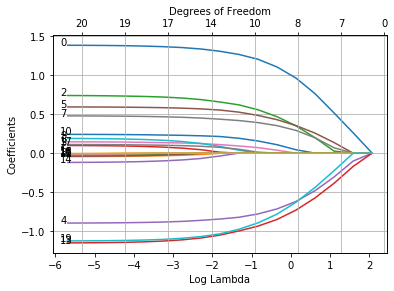

In [7]:
glmnetPlot(fit, xvar = 'lambda', label = True);

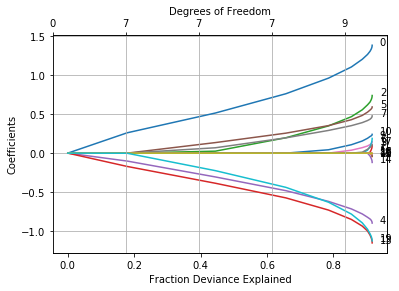

In [8]:
glmnetPlot(fit, xvar = 'dev', label = True);

In [14]:
y.shape

(100,)

In [9]:
warnings.filterwarnings('ignore')
cvfit = cvglmnet(x = x.copy(), y = y.copy(), ptype = 'mse', nfolds = 20)
warnings.filterwarnings('default')

TypeError: 'numpy.float64' object cannot be interpreted as an integer